# Regresja liniowa

Naszym celem jest empiryczne sprawdzenie twierdzenia:

Niech $A \in \mathbb{R}^{N\times K}$ będzie macierzą, która przekształca $\mathbb{R}^{K}$ w $\mathbb{R}^N$, i niech $y \in \mathbb{R}^{K}$.

Wtedy punkt $x_0 \in \mathbb{R}^K$ spełnia

$$
x_0 = \mathrm{argmin} \{ x \in \mathbb{R}^K   \colon \| Ax - y \|^2 \}
$$

wtedy i tylko wtedy gdy

$$
A^TA x_0 = A^Ty.
$$


In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

Proszę narysować wykres funkcji w kształcie 

$
f(x)=x^2
$ 

na odcinku $[0,3]$.

Będzie to krzywa, który będziemy chcieli aproksymować, używając regresji liniowej.

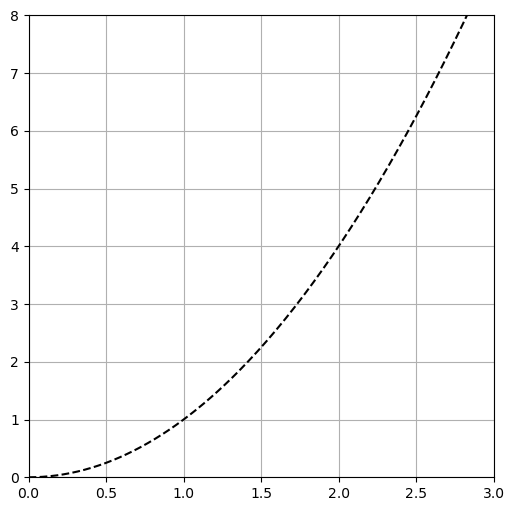

In [2]:
f = lambda x: (x**2)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k');
plt.grid()
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)=x^2$.

Na ich podstawie będziemy wykonywać naszej predykcji.

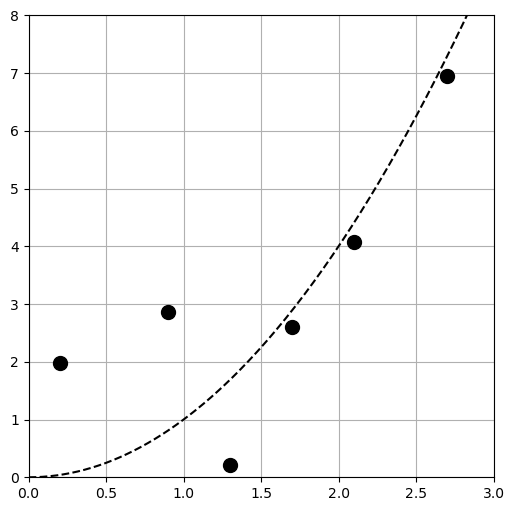

In [3]:
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.grid()
plt.show()

Nauczmy prosty model regresji liniowej

$$
y=a\cdot x + b
$$

na naszych danych oraz narysujmy prostą regresji.

In [4]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y);
print(lr.coef_)
print(lr.intercept_)

[2.44065062]
-0.9589740432131402


Definiujemy naszą funkcję regresji

In [5]:
f_lr = lambda x: lr.coef_ * x +lr.intercept_

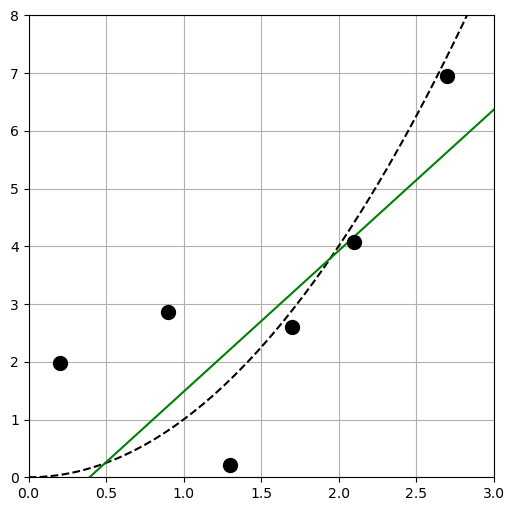

In [6]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.grid()
plt.show()

Teraz możemy wykonać predykcję dla punktu 
$$
x_0 = 1.5
$$

In [7]:
point = np.array([1.5])
y_point = lr.predict(point[:, np.newaxis])

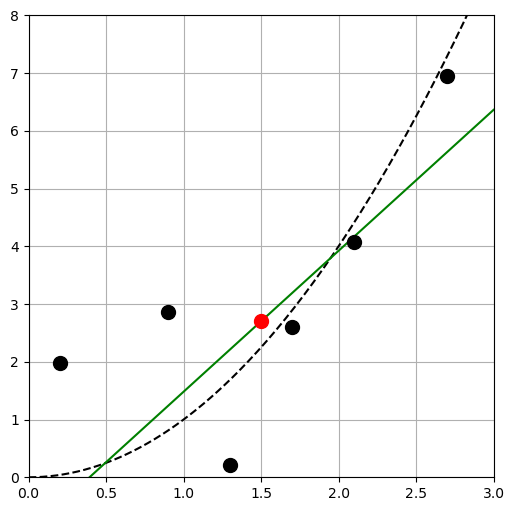

In [8]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.plot(point, y_point, 'or', ms=10);
plt.grid()
plt.show()

Możemy wypisać miarę dopasowania $R^2$. Narazie nie wnikamy w to, co ona oznacza.

In [9]:
from sklearn.metrics import r2_score
print(lr.score(x[:, np.newaxis], y))
print(r2_score(lr.predict(x[:, np.newaxis]), y))

0.6179372392559148
0.3817126781286988


S## Zadanie 1 (1 punkt)
Stwórz macierz postaci:
$$
A=\begin{bmatrix}
x_1 & 1\\
\ddots & \ddots\\
x_n & 1\\
\end{bmatrix}
$$

i rozwiąż równanie

$$
A^TA x = A^Ty.
$$

gdzie (x,y) to nasz zbiór treningowy. 

Użyj funkcji <tt>linalg.solve</tt>.

a = 2.72
b = 2.65


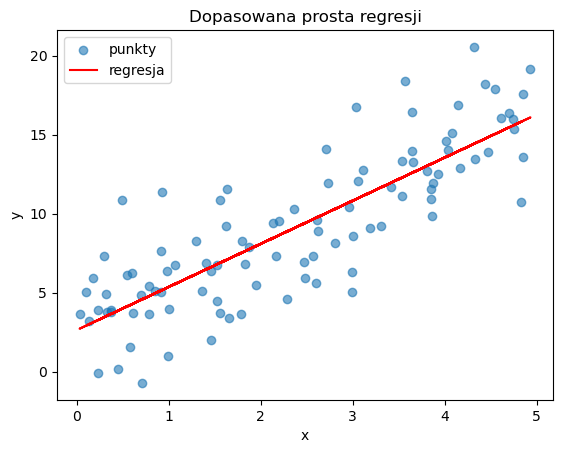

In [30]:

import numpy as np

# Ustal seed (żeby wyniki były powtarzalne)
np.random.seed(42)

# 100 losowych punktów x z przedziału [0, 10]
x = np.random.uniform(0, 5, size=100)

# Tworzymy y = 3x + 2 + losowy szum
y = 3 * x + 2 + np.random.normal(0, 3, size=100)

# Tworzymy macierz A (x i kolumna jedynek)
A = np.column_stack((x, np.ones_like(x)))


# Liczymy AᵀA i Aᵀy
ATA = np.dot(A.T, A)
ATy = np.dot(A.T, y)


# Rozwiązanie układu równań: (AᵀA)w = Aᵀy
a, b  = np.linalg.solve(ATA, ATy)

print(f"a = {a:.2f}")
print(f"b = {b:.2f}")


plt.scatter(x, y, label="punkty", alpha=0.6)
plt.plot(x, a * x + b, color='red', label="regresja")
plt.legend()
plt.title("Dopasowana prosta regresji")
plt.xlabel("x")
plt.ylabel("y")
plt.show()



## Zadanie 2 (1 punkt)
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [26]:
from scipy import optimize


def gradf(vector):
    x,y=vector
    dfdx = 2 * (x + 1)
    dfdy = 2 * y
    return np.array([dfdx, dfdy])

def f(vector):
    x,y=vector
    return ((x+1)**2 + y**2)

x0 = np.array([0.0, 0.0])

res = optimize.fmin_cg(f, x0, disp=True)
print(res)



"""
z  fprime=gradf

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
[-1.  0.]




bez  fprime=gradf

         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 3
[-1.00000001e+00 -7.45058060e-09]

"""



Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 3
[-1.00000001e+00 -7.45058060e-09]


'\nz  fprime=gradf\n\nOptimization terminated successfully.\n         Current function value: 0.000000\n         Iterations: 1\n         Function evaluations: 3\n         Gradient evaluations: 3\n[-1.  0.]\n\n\n\n\nbez  fprime=gradf\n\n         Current function value: 0.000000\n         Iterations: 1\n         Function evaluations: 9\n         Gradient evaluations: 3\n[-1.00000001e+00 -7.45058060e-09]\n\n'

## Zadanie 3 (1 punkt)
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error}(a,b;(x,y)) =  \sum_{i=1}^{n} ( y_i - (ax_i+b) )^2.
$$

In [28]:


x = np.array([0.0, 1.0, 2.0])
y = np.array([0.0, 1.0, 2.0])

a1=1
b1=0

a2=2
b2=1


def compute_error(a,b,x,y):
    x = np.asarray(x)
    y = np.asarray(y)
    y_pred = a * x + b
    error = np.sum((y - y_pred) ** 2)
    return error

print(compute_error(a1,b1,x,y))
print(compute_error(a2,b2,x,y))


0.0
14.0


## Zadanie 4 (1 punkt)
Zminimalizuj funkcją $\mathrm{compute\_error}$ z poprzedniego zadania po parametrach $a,b$ (numerycznie, korzystając z funkcji ```fmin_cg``` z paczki ```optimize```).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [34]:


from scipy import optimize



def compute_error(a,b,x,y):
    x = np.asarray(x)
    y = np.asarray(y)
    y_pred = a * x + b
    error = np.sum((y - y_pred) ** 2)
    return error

def compute_error_vector(vector,x,y):
    x = np.asarray(x)
    y = np.asarray(y)
    a,b = vector
    y_pred = a * x + b
    error = np.sum((y - y_pred) ** 2)
    return error


x = np.array([0.0, 1.0, 2.0])
y = np.array([0.0, 1.0, 2.0])

initial_params = np.array([0.0, 0.0])


res = optimize.fmin_cg(compute_error_vector, initial_params, args=(x, y))
print(res)



Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5
[9.99999995e-01 2.33895942e-09]


## Zadanie 5 (1 punkt)
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error\_1}(a,b;(x,y)) =  \sum_{i=1}^{n} |y_i - (ax_i+b)|.
$$

In [38]:



from scipy import optimize



def compute_error_1(a,b,x,y):
    x = np.asarray(x)
    y = np.asarray(y)
    y_pred = a * x + b
    error = np.sum(np.abs(y - y_pred))
    return error

def compute_error_1_vector(vector,x,y):
    x = np.asarray(x)
    y = np.asarray(y)
    a,b = vector
    y_pred = a * x + b
    error = np.sum(np.abs(y - y_pred))
    return error



x = np.array([0.0, 1.0, 2.0])
y = np.array([0.0, 1.0, 2.0])

initial_params = np.array([0.0, 0.0])


res = optimize.fmin_cg(compute_error_1_vector, initial_params, args=(x, y))
print(res)




         Current function value: 0.000000
         Iterations: 14
         Function evaluations: 212
         Gradient evaluations: 68
[9.99999996e-01 7.00758453e-09]


/home/msztu223/miniconda3/envs/PSI/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1680: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_cg(f, x0, args, fprime, callback=callback, c1=c1, c2=c2,


## Zadanie 6 (1 punkt)
Zminimalizuj funkcją $\mathrm{compute\_error\_1}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

L2: a = 1.29 , b = 5.23
L1: a = 1.43 , b = 3.89


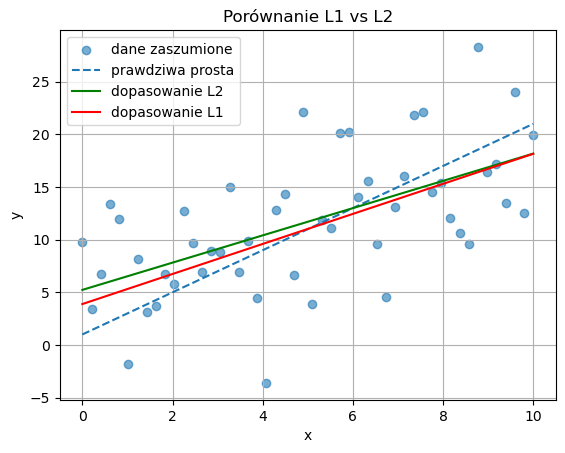

In [43]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

np.random.seed(0)

# Generujemy dane liniowe + losowy szum
x = np.linspace(0, 10, 50)
y_true = 2 * x + 1
noise = np.random.normal(0, 5, size=x.shape)
y = y_true + noise


# Błąd L2 (kwadratowy)
def compute_error_L2(params, x, y):
    a, b = params
    y_pred = a * x + b
    return np.sum((y - y_pred) ** 2)

# Błąd L1 (modułowy)
def compute_error_L1(params, x, y):
    a, b = params
    y_pred = a * x + b
    return np.sum(np.abs(y - y_pred))


start = np.array([0.0, 0.0])

# L2 (najmniejsze kwadraty)
res_l2 = optimize.fmin_cg(compute_error_L2, start, args=(x, y), disp=False)

# L1 (najmniejszy moduł)
res_l1 = optimize.fmin_cg(compute_error_L1, start, args=(x, y), disp=False)



a_l2, b_l2 = res_l2
a_l1, b_l1 = res_l1

print("L2: a =", round(a_l2, 2), ", b =", round(b_l2, 2))
print("L1: a =", round(a_l1, 2), ", b =", round(b_l1, 2))

# Wykres
plt.scatter(x, y, label="dane zaszumione", alpha=0.6)
plt.plot(x, y_true, label="prawdziwa prosta", linestyle='--')
plt.plot(x, a_l2 * x + b_l2, label="dopasowanie L2", color='green')
plt.plot(x, a_l1 * x + b_l1, label="dopasowanie L1", color='red')
plt.legend()
plt.title("Porównanie L1 vs L2")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


"""
L2 (zielona) może być mocniej ściągana przez ekstremalne wartości (outliery).

L1 (czerwona) jest bardziej odporna na outliery – traktuje wszystkie błędy liniowo.
"""



# Estymatory największej wiarygodności

## Zadanie 7 (1 punkt)
Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma)=\prod_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów normalnych:

$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [62]:


from scipy.stats import norm
import numpy as np

def likelihood(mu, sigma, data):
    if sigma <= 1e-8:
        return np.inf
    pdf_vals = norm.pdf(data, loc=mu, scale=sigma)
    return np.prod(pdf_vals)  # iloczyn gęstości


def log_likelihood(mu, sigma, data):
    if sigma <= 1e-8:
        return np.inf
    logpdf_vals = norm.logpdf(data, loc=mu, scale=sigma)
    return np.sum(logpdf_vals)

data = np.array([4.8, 5.0, 5.2, 4.9, 5.1])
mu = 5.0
sigma = 0.14

L = likelihood(mu, sigma, data)
lnL = log_likelihood(mu, sigma, data)

print("Wiarygodność (L):", L)
print("Log-wiarygodność (ln L):", lnL)


Wiarygodność (L): 14.656020514688226
Log-wiarygodność (ln L): 2.6848512076775357


In [65]:
#szukamy maximum funkcji wairygodnosci

from scipy.optimize import fmin_cg
from scipy.stats import norm
import numpy as np


def neg_log_likelihood_vector(vector, data):
    mu, sigma = vector
    if sigma <= 1e-8:
        return np.inf
    return -np.sum(norm.logpdf(data, loc=mu, scale=sigma))

data = np.array([4.8, 5.0, 5.2, 4.9, 5.1])
initial_params = np.array([5.0, 0.1])

result = fmin_cg(neg_log_likelihood_vector, initial_params, args=(data,))
mu_result, sigma_result = result

print("MLE mu =", mu_result)
print("MLE sigma =", sigma_result)



Optimization terminated successfully.
         Current function value: -2.685365
         Iterations: 1
         Function evaluations: 33
         Gradient evaluations: 10
MLE mu = 4.999999996913868
MLE sigma = 0.14142134870238657


## Zadanie 8 (1 punkt)
Napisz funkcję gęstości rozkładu Split Gaussian:

$$
SN(x;m,\sigma^2,\tau^2) = \left\{ \begin{array}{ll}
c \cdot \exp[-\frac{1}{2\sigma^2}(x-m)^2], & \textrm{for $x\leq m$},\\
c \cdot \exp[-\frac{1}{2\tau^2\sigma^2}(x-m)^2], & \textrm{for $x>m$},\\
\end{array} \right.
$$

gdzie $c=\sqrt{\frac{2}{\pi}}\sigma^{-1}(1+\tau)^{-1}$.

Narysuj gęstości dla parametrów:

<ul>
<li>$\mu=0$, $\sigma=1$, $\tau=1$</li>
<li>$\mu=0$, $\sigma=1$, $\tau=1/2$</li>
<li>$\mu=1$, $\sigma=1/2$, $\tau=1$</li>
</ul>

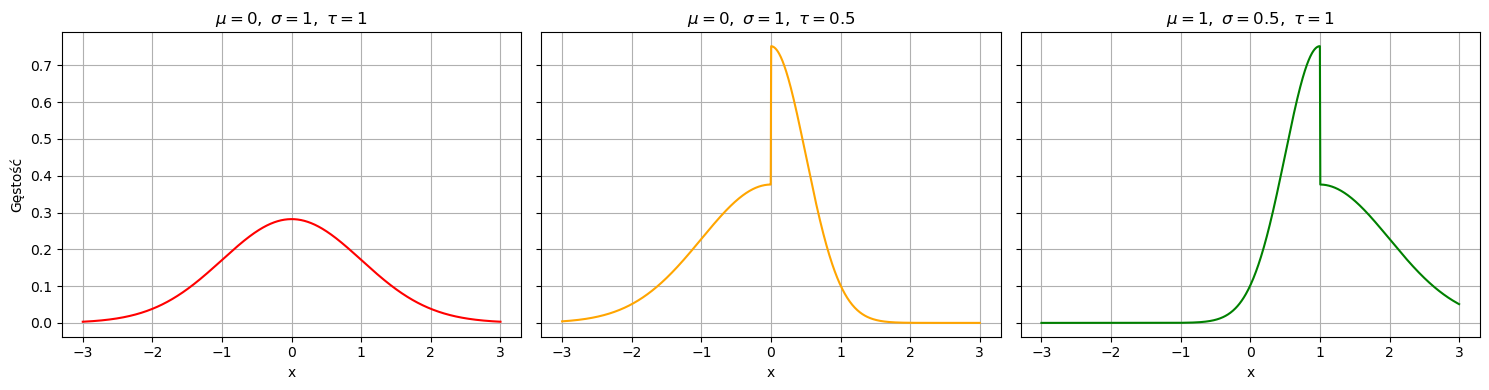

In [78]:
from scipy.stats import norm
import numpy as np

def split_gaussian_pdf(x, mu, sigma_left, sigma_right):
    norm_const = np.sqrt(2) / (sigma_left + sigma_right)
    pdf = np.where(
        x <= mu,
        norm_const * norm.pdf((x - mu) / sigma_left) / sigma_left,
        norm_const * norm.pdf((x - mu) / sigma_right) / sigma_right
    )
    return pdf


# Zakres x
x = np.linspace(-3, 3, 1000)

# Parametry rozkładu
m1 = 0.0
s1 = 1.0
t1= 1.0

m2 = 0.0
s2 = 1.0
t2= 0.5


m3 = 1.0
s3 = 0.5
t3= 1.0


# Obliczanie gęstości
y1 = split_gaussian_pdf(x, m1, s1, t1)
y2 = split_gaussian_pdf(x, m2, s2, t2)
y3 = split_gaussian_pdf(x, m3, s3, t3)






# Rysowanie 3 wykresów obok siebie
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

axs[0].plot(x, y1, color='red')
axs[0].set_title(r"$\mu=0,\ \sigma=1,\ \tau=1$")
axs[0].grid(True)

axs[1].plot(x, y2, color='orange')
axs[1].set_title(r"$\mu=0,\ \sigma=1,\ \tau=0.5$")
axs[1].grid(True)

axs[2].plot(x, y3, color='green')
axs[2].set_title(r"$\mu=1,\ \sigma=0.5,\ \tau=1$")
axs[2].grid(True)

# Podpisy osi
for ax in axs:
    ax.set_xlabel("x")
axs[0].set_ylabel("Gęstość")

plt.tight_layout()
plt.show()



